In [1]:
import os
os.chdir('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/Code/Library')

from ExperimentFunc import exp_func, beta_gen_posmnt
from Step1 import solve_beta_mnt
from Step2 import find_v_mnt
from Step3 import solve_omega, gw_mnt, proj_posmnt_tan_cone, proj_posmnt_neg_tan_cone

from math import log
import numpy as np

from sklearn.isotonic import IsotonicRegression

from scipy import linalg
from scipy import stats

from collections import namedtuple

from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
Params = namedtuple('Params', ['step1', 'step2', 'step3'])

### <span style="color:purple">1) Cov(X) = I</span>

In [3]:
N = 100
n = 100
p = 100
Sigma_sqrt = np.eye(p)
noise_sd = 2
debias_idx = p - 1
param_set = Params([True],  # True if is pos mnt cone
                   [], 
                   [gw_mnt, proj_posmnt_tan_cone, proj_posmnt_neg_tan_cone])

In [4]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_posmnt, 
             solve_beta_mnt, 
             find_v_mnt, 
             solve_omega)

iter: 0
The L2 error:  1.0007342527005554
iter: 1
The L2 error:  0.9059728374489876
iter: 2
The L2 error:  0.4186078322993372
iter: 3
The L2 error:  0.6267346243075801
iter: 4
The L2 error:  0.5193504387875049
iter: 5
The L2 error:  1.0374641234664905
iter: 6
The L2 error:  1.0058916620256775
iter: 7
The L2 error:  1.1700302289972324
iter: 8
The L2 error:  0.32894537883640657
iter: 9
The L2 error:  1.091023719714151
iter: 10
The L2 error:  0.9281946926160469
iter: 11
The L2 error:  0.7148541744525488
iter: 12
The L2 error:  1.1037579921652176
iter: 13
The L2 error:  0.5912653959679044
iter: 14
The L2 error:  0.6387672089699306
iter: 15
The L2 error:  0.3534074796460376
iter: 16
The L2 error:  0.6096334814836307
iter: 17
The L2 error:  0.6447225641608458
iter: 18
The L2 error:  0.8269506538331212
iter: 19
The L2 error:  1.1355438755784193
iter: 20
The L2 error:  0.6629229421012849
iter: 21
The L2 error:  0.7175441919717694
iter: 22
The L2 error:  0.9566680879948072
iter: 23
The L2 error

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [5]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -1.1676554960113796


In [6]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.027117105858041342


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

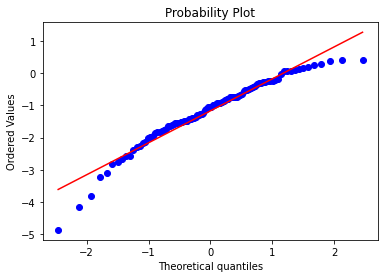

In [7]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

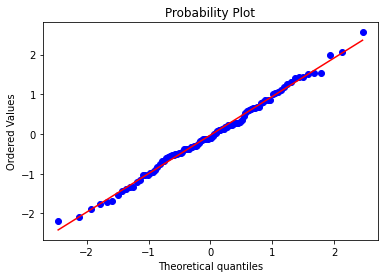

In [8]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [9]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/PosMonotoneCone/identity_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/PosMonotoneCone/identity_z.npy', z)

###  <span style="color:purple">2) Cov(X) with bounded eigenvalues</span>

In [11]:
N = 100
n = 100
p = 100

# Generate a cov matrix with bounded eigenvalues
# generate eigenvalues
cov_eigv = np.random.uniform(low = 0.3, high = 3.0, size = (p,))
D_sqrt = np.diag(cov_eigv**0.5)
# generate an orthonormal matrix
a = np.random.normal(size = (p,p))
u, s, vh = np.linalg.svd(a.T@a, full_matrices=True)
# generate the square root of cov matrix 
Sigma_sqrt = D_sqrt @ u.T

noise_sd = 2
debias_idx = p - 1
param_set = Params([True],  # True if is pos mnt cone
                   [], 
                   [gw_mnt, proj_posmnt_tan_cone, proj_posmnt_neg_tan_cone])

In [12]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_posmnt, 
             solve_beta_mnt, 
             find_v_mnt, 
             solve_omega)

iter: 0
The L2 error:  0.7984664977304422
iter: 1
The L2 error:  0.922176428884025
iter: 2
The L2 error:  0.6018542742844106
iter: 3
The L2 error:  0.3493829766281264
iter: 4
The L2 error:  1.1569432714631092
iter: 5
The L2 error:  0.6217668491179466
iter: 6
The L2 error:  0.34157583341446324
iter: 7
The L2 error:  0.5285897415416432
iter: 8
The L2 error:  0.34107373379799755
iter: 9
The L2 error:  0.4524226830164171
iter: 10
The L2 error:  0.4504365750664247
iter: 11
The L2 error:  0.6052750407402682
iter: 12
The L2 error:  0.662960877843573
iter: 13
The L2 error:  0.5600971244194474
iter: 14
The L2 error:  0.7081015345729955
iter: 15
The L2 error:  0.6794252040134885
iter: 16
The L2 error:  0.6159628441742772
iter: 17
The L2 error:  0.2064700286976315
iter: 18
The L2 error:  0.6221166900116428
iter: 19
The L2 error:  0.6691905077599692
iter: 20
The L2 error:  0.6133721718588437
iter: 21
The L2 error:  0.732993124125732
iter: 22
The L2 error:  0.6996420637903674
iter: 23
The L2 error:

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [13]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -1.1164952614704973


In [14]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.02813559429755643


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

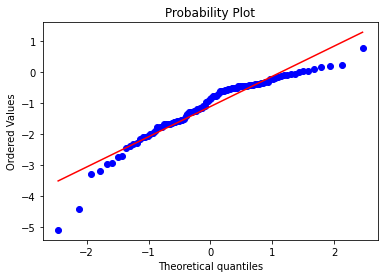

In [15]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

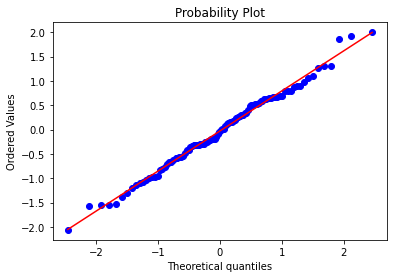

In [16]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [17]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/PosMonotoneCone/bddeig_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/PosMonotoneCone/bddeig_z.npy', z)

### <span style = 'color:purple'>3) Cov(X) is the Cov of AR(1) Process</span>

In [18]:
N = 100
n = 100
p = 100

# Generate the squar root of cov matrix
rho = 0.4
rho_vec = []
for i in range(p):
    rho_vec.append(rho**i)
rho_vec = np.array(rho_vec)
# The cholesky decomposition of cov == the squar root of cov
Sigma_sqrt = [rho_vec]
for i in range(1, p):
    rho_vec_shifted = np.concatenate((np.zeros(i), rho_vec[:-i]))
#     print(rho_vec_shifted)
    Sigma_sqrt.append(rho_vec_shifted * (1-rho**2)**0.5)
Sigma_sqrt = np.array(Sigma_sqrt)

noise_sd = 2
debias_idx = p - 1
param_set = Params([True],  # True if is pos mnt cone
                   [], 
                   [gw_mnt, proj_posmnt_tan_cone, proj_posmnt_neg_tan_cone])

In [19]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_posmnt, 
             solve_beta_mnt, 
             find_v_mnt, 
             solve_omega)

iter: 0
The L2 error:  0.328555077540863
iter: 1
The L2 error:  0.8829786144224991
iter: 2
The L2 error:  0.178274702756116
iter: 3
The L2 error:  0.4847372042737507
iter: 4
The L2 error:  0.9824867049288513
iter: 5
The L2 error:  0.9115719899654974
iter: 6
The L2 error:  0.7060756737327896
iter: 7
The L2 error:  0.4054649044491799
iter: 8
The L2 error:  0.52249970117643
iter: 9
The L2 error:  0.6477856310623241
iter: 10
The L2 error:  1.1141912660126725
iter: 11
The L2 error:  0.5988546952666761
iter: 12
The L2 error:  0.3744798840679724
iter: 13
The L2 error:  0.7151752155698915
iter: 14
The L2 error:  0.5864931980477665
iter: 15
The L2 error:  0.5288625773449304
iter: 16
The L2 error:  0.7090506229011284
iter: 17
The L2 error:  0.7495173916353063
iter: 18
The L2 error:  0.6926483274798061
iter: 19
The L2 error:  0.26298555725458167
iter: 20
The L2 error:  0.37135136921801193
iter: 21
The L2 error:  0.5829600391587855
iter: 22
The L2 error:  0.8410524798145735
iter: 23
The L2 error: 

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [20]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -0.8425743590026111


In [21]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.09664852872592448


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

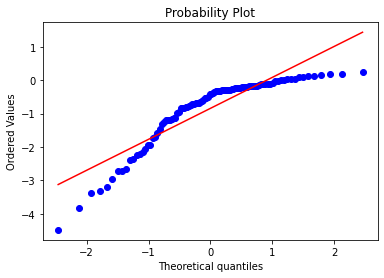

In [22]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

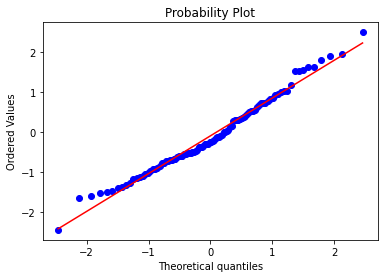

In [23]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [24]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/PosMonotoneCone/ar1_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/PosMonotoneCone/ar1_z.npy', z)